# NYPD Crime Call Predication Model

## Problem
In New York City, the huge population density brings with it a large number of crimes occurring at any given moment. Some of these crimes are then going to then be reported to 911 emergency dispatchers, and then dispatchers will notify police of where to go and what to expect for the crimecalled in. This process of receiving a call about a crime, figuring out what type of crime the caller is reporting and then sending the information to police is a long process that requires a certain level of information in order for the dispatcher to know how to respond to the situation. Because the nature of a crime is that it is sudden, and the circumstances of the crime can change, every second can be the difference between life and death. 

## Client
This model would be extremely useful to 911 dispatchers in New York City. With this model, some basic information can be given to the dispatcher even before anything is said in the call. This can give the dispatcher a chance to ask more specific questions to the caller that can speed up the process of sending police to the scene of the crime which could potentially save lives.

## Data Wrangling Process
After loading the data, I picked calls that were sent to the NYPD. I then filled any dates and times that were missing from the ending time with times and dates that the call came in. The date and time columns wer then joined and converted into datetime values. New columns were then made for the month, day of week, and hour of the call received. After sorting out the dates and times, I limited the data to only the top 10 most frequent crimes, and then created a new binary column for if the crime is physically dangerous and in need of urgent response.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
description = pd.read_csv('NYPD_Incident_Level_Data_Column_Descriptions.csv')
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


In [3]:
description

,Column,Description
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...
5,RPT_DT,Date event was reported to police
6,KY_CD,Three digit offense classification code
7,OFNS_DESC,Description of offense corresponding with key ...
8,PD_CD,Three digit internal classification code (more...
9,PD_DESC,Description of internal classification corresp...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048796 entries, 0 to 6048795
Data columns (total 24 columns):
CMPLNT_NUM           int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
RPT_DT               object
KY_CD                int64
OFNS_DESC            object
PD_CD                float64
PD_DESC              object
CRM_ATPT_CPTD_CD     object
LAW_CAT_CD           object
JURIS_DESC           object
BORO_NM              object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC    object
PREM_TYP_DESC        object
PARKS_NM             object
HADEVELOPT           object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon              object
dtypes: float64(6), int64(2), object(16)
memory usage: 1.1+ GB


Limiting the analysis to only cases that went to NYPD specifically

In [5]:
df = df[df.JURIS_DESC == "N.Y. POLICE DEPT"]
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


In [6]:
df.JURIS_DESC.value_counts()

N.Y. POLICE DEPT    5373664
Name: JURIS_DESC, dtype: int64

In [7]:
df.LAW_CAT_CD.value_counts()

MISDEMEANOR    3034806
FELONY         1671071
VIOLATION       667787
Name: LAW_CAT_CD, dtype: int64

In [8]:
df.OFNS_DESC.value_counts()

PETIT LARCENY                           942486
HARRASSMENT 2                           658744
CRIMINAL MISCHIEF & RELATED OF          545221
ASSAULT 3 & RELATED OFFENSES            544440
GRAND LARCENY                           481296
DANGEROUS DRUGS                         312739
OFF. AGNST PUB ORD SENSBLTY &           290699
BURGLARY                                210779
ROBBERY                                 205573
FELONY ASSAULT                          193945
MISCELLANEOUS PENAL LAW                 117776
DANGEROUS WEAPONS                       113003
GRAND LARCENY OF MOTOR VEHICLE          110989
OFFENSES AGAINST PUBLIC ADMINI           88473
INTOXICATED & IMPAIRED DRIVING           80649
VEHICLE AND TRAFFIC LAWS                 65383
THEFT-FRAUD                              62387
SEX CRIMES                               55338
FORGERY                                  48115
CRIMINAL TRESPASS                        45477
FRAUDS                                   32945
POSSESSION OF

In [9]:
df.LOC_OF_OCCUR_DESC.value_counts()

INSIDE         2672498
FRONT OF       1289606
OPPOSITE OF     147577
REAR OF         102327
OUTSIDE           2858
                   188
Name: LOC_OF_OCCUR_DESC, dtype: int64

In [10]:
df.HADEVELOPT.value_counts().head(10)

MARKHAM GARDENS               492
ARMSTRONG II                  467
SMITH                         209
WEST BRIGHTON I               171
LONG ISLAND BAPTIST HOUSES    147
BAYSIDE-OCEAN BAY APTS        128
ARMSTRONG I                   128
MARCY                         127
PELHAM PARKWAY                120
PARKSIDE                      117
Name: HADEVELOPT, dtype: int64

In [11]:
df.PARKS_NM.value_counts().head(10)

CENTRAL PARK                      1050
FLUSHING MEADOWS CORONA PARK       800
CONEY ISLAND BEACH & BOARDWALK     535
RIVERSIDE PARK                     420
PROSPECT PARK                      275
MACOMBS DAM PARK                   252
UNION SQUARE PARK                  245
CLAREMONT PARK                     240
MARCUS GARVEY PARK                 233
WASHINGTON SQUARE PARK             225
Name: PARKS_NM, dtype: int64

In [12]:
df.CMPLNT_TO_DT = df.CMPLNT_TO_DT.fillna(df.CMPLNT_FR_DT)
df.CMPLNT_TO_TM = df.CMPLNT_TO_TM.fillna(df.CMPLNT_FR_TM)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
offense_count = df.OFNS_DESC.value_counts()

In [14]:
offense_count.head(20)

PETIT LARCENY                     942486
HARRASSMENT 2                     658744
CRIMINAL MISCHIEF & RELATED OF    545221
ASSAULT 3 & RELATED OFFENSES      544440
GRAND LARCENY                     481296
DANGEROUS DRUGS                   312739
OFF. AGNST PUB ORD SENSBLTY &     290699
BURGLARY                          210779
ROBBERY                           205573
FELONY ASSAULT                    193945
MISCELLANEOUS PENAL LAW           117776
DANGEROUS WEAPONS                 113003
GRAND LARCENY OF MOTOR VEHICLE    110989
OFFENSES AGAINST PUBLIC ADMINI     88473
INTOXICATED & IMPAIRED DRIVING     80649
VEHICLE AND TRAFFIC LAWS           65383
THEFT-FRAUD                        62387
SEX CRIMES                         55338
FORGERY                            48115
CRIMINAL TRESPASS                  45477
Name: OFNS_DESC, dtype: int64

In [15]:
len(offense_count.index)

70

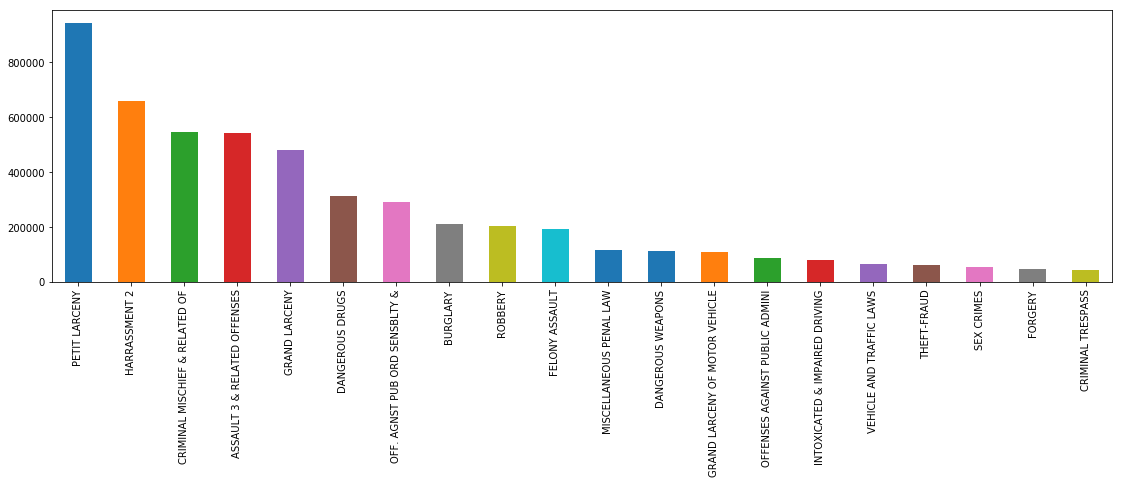

In [16]:
plt.figure(figsize=[19,5])
offense_count.head(20).plot(kind='bar')

The most common crime reported is petty theft at around 800,000 with a sharp decay in number of reported crimes further right on the bargraph above.

In [18]:
print(len(df.OFNS_DESC))
print(offense_count['PETIT LARCENY'] / len(df.OFNS_DESC))

5373664
0.17538982712726364


In [19]:
precinct_count = df.ADDR_PCT_CD.value_counts()
precinct_count.head(10)

75.0     170409
44.0     141243
43.0     132046
52.0     123555
46.0     123179
14.0     118874
120.0    116401
67.0     113216
47.0     100314
40.0      98798
Name: ADDR_PCT_CD, dtype: int64

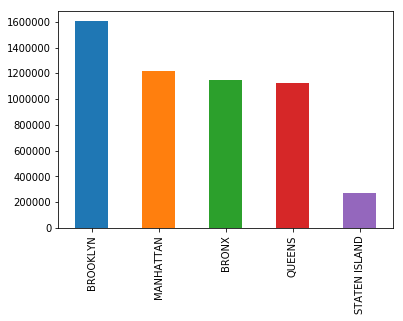

In [20]:
boroughs = df.BORO_NM.value_counts()
boroughs.plot(kind='bar')

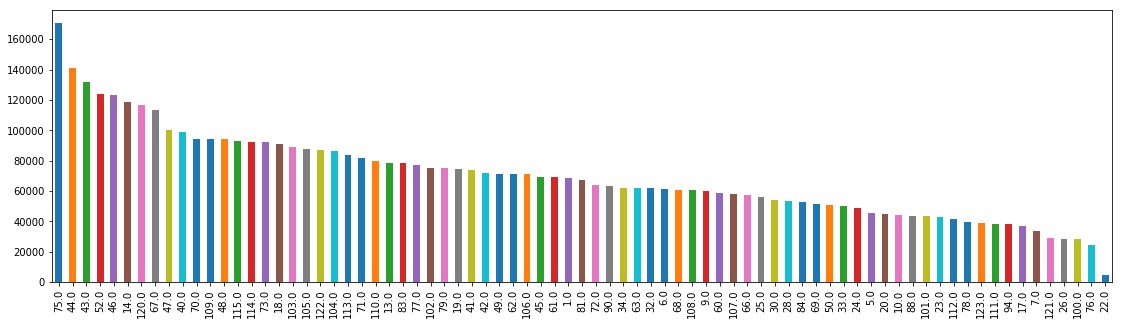

In [21]:
plt.figure(figsize=[19,5])
precinct_count.plot(kind='bar')

It seems that precinct number 75 has the highest number of crimes in its district, and it slowly tapers of for each precinct after it.

In [22]:
df['CMPLT_FR'] = df.CMPLNT_FR_DT + df.CMPLNT_FR_TM
df['CMPLT_TO'] = df.CMPLNT_TO_DT + df.CMPLNT_TO_TM
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,CMPLT_FR,CMPLT_TO
0,101109527,12/31/2015,23:45:00,12/31/2015,23:45:00,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",12/31/201523:45:00,12/31/201523:45:00
1,153401121,12/31/2015,23:36:00,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",12/31/201523:36:00,12/31/201523:36:00
2,569369778,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",12/31/201523:30:00,12/31/201523:30:00
3,968417082,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",12/31/201523:30:00,12/31/201523:30:00
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",12/31/201523:25:00,12/31/201523:30:00


In [23]:
df.CMPLT_TO = pd.to_datetime(df.CMPLT_TO,format='%m/%d/%Y%H:%M:%S',errors='coerce')
df.CMPLT_FR = pd.to_datetime(df.CMPLT_FR,format='%m/%d/%Y%H:%M:%S',errors='coerce')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,CMPLT_FR,CMPLT_TO
0,101109527,12/31/2015,23:45:00,12/31/2015,23:45:00,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",2015-12-31 23:45:00,2015-12-31 23:45:00
1,153401121,12/31/2015,23:36:00,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",2015-12-31 23:36:00,2015-12-31 23:36:00
2,569369778,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",2015-12-31 23:30:00,2015-12-31 23:30:00
3,968417082,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",2015-12-31 23:30:00,2015-12-31 23:30:00
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",2015-12-31 23:25:00,2015-12-31 23:30:00


In [24]:
prem = df[df.PREM_TYP_DESC != np.nan]
prem

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,CMPLT_FR,CMPLT_TO
0,101109527,12/31/2015,23:45:00,12/31/2015,23:45:00,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",2015-12-31 23:45:00,2015-12-31 23:45:00
1,153401121,12/31/2015,23:36:00,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",2015-12-31 23:36:00,2015-12-31 23:36:00
2,569369778,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",2015-12-31 23:30:00,2015-12-31 23:30:00
3,968417082,12/31/2015,23:30:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",2015-12-31 23:30:00,2015-12-31 23:30:00
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",2015-12-31 23:25:00,2015-12-31 23:30:00
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)",2015-12-31 23:18:00,2015-12-31 23:25:00
6,608231454,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)",2015-12-31 23:15:00,2015-12-31 23:15:00
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)",2015-12-31 23:15:00,2015-12-31 23:15:00
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)",2015-12-31 23:15:00,2015-12-31 23:30:00
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)",2015-12-31 23:10:00,2015-12-31 23:10:00


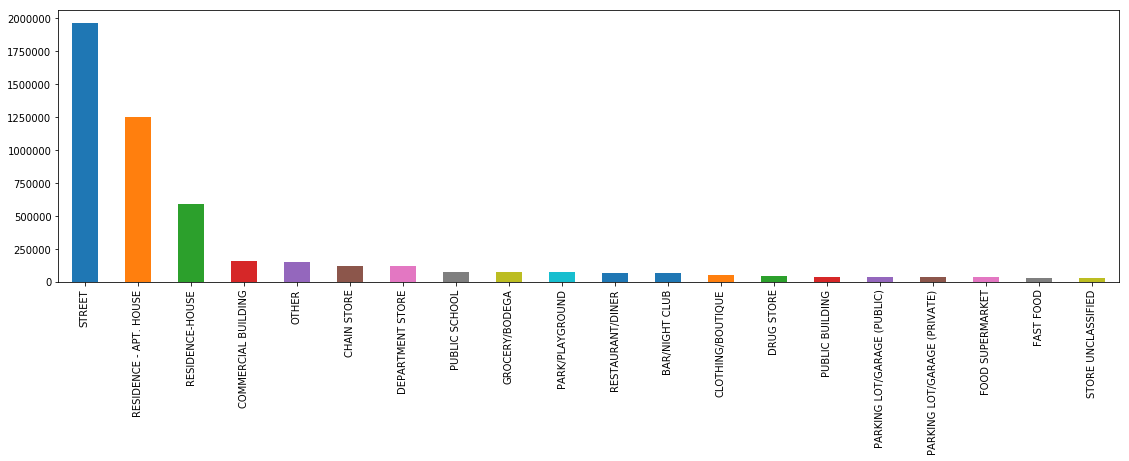

In [25]:
plt.figure(figsize=[19,5])
prem.PREM_TYP_DESC.value_counts().head(20).plot(kind='bar')

In [25]:
df.count()

CMPLNT_NUM           5373664
CMPLNT_FR_DT         5373042
CMPLNT_FR_TM         5373619
CMPLNT_TO_DT         5373529
CMPLNT_TO_TM         5373652
RPT_DT               5373664
KY_CD                5373664
OFNS_DESC            5359025
PD_CD                5368951
PD_DESC              5368951
CRM_ATPT_CPTD_CD     5373659
LAW_CAT_CD           5373664
JURIS_DESC           5373664
BORO_NM              5373227
ADDR_PCT_CD          5373300
LOC_OF_OCCUR_DESC    4215054
PREM_TYP_DESC        5340953
PARKS_NM               16003
HADEVELOPT              8111
X_COORD_CD           5208427
Y_COORD_CD           5208427
Latitude             5208427
Longitude            5208427
Lat_Lon              5208427
CMPLT_FR             5372128
CMPLT_TO             5372023
dtype: int64

## Data Wrangling

In [26]:
df = df.drop(['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM','LAW_CAT_CD',
              "LOC_OF_OCCUR_DESC","PARKS_NM","HADEVELOPT","Lat_Lon","X_COORD_CD","Y_COORD_CD","Latitude","Longitude"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373664 entries, 0 to 6048794
Data columns (total 13 columns):
CMPLNT_NUM          int64
RPT_DT              object
KY_CD               int64
OFNS_DESC           object
PD_CD               float64
PD_DESC             object
CRM_ATPT_CPTD_CD    object
JURIS_DESC          object
BORO_NM             object
ADDR_PCT_CD         float64
PREM_TYP_DESC       object
CMPLT_FR            datetime64[ns]
CMPLT_TO            datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 574.0+ MB


In [27]:
df = df.dropna(how='any')
df.count()

CMPLNT_NUM          5323712
RPT_DT              5323712
KY_CD               5323712
OFNS_DESC           5323712
PD_CD               5323712
PD_DESC             5323712
CRM_ATPT_CPTD_CD    5323712
JURIS_DESC          5323712
BORO_NM             5323712
ADDR_PCT_CD         5323712
PREM_TYP_DESC       5323712
CMPLT_FR            5323712
CMPLT_TO            5323712
dtype: int64

Made new column for boroughs in borough column that contain integers instead of strings.

In [28]:
borough = []
for row in df.BORO_NM:
    if row == 'QUEENS':
        borough.append(1)
    elif row == 'BROOKLYN':
        borough.append(2)
    elif row == 'STATEN ISLAND':
        borough.append(3)
    elif row == 'BRONX':
        borough.append(4)
    elif row == 'MANHATTAN':
        borough.append(5)
df['BORO_NUM'] = borough
df.head()

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,CMPLT_FR,CMPLT_TO,BORO_NUM
0,101109527,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,N.Y. POLICE DEPT,BRONX,44.0,BAR/NIGHT CLUB,2015-12-31 23:45:00,2015-12-31 23:45:00,4
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,28.0,OTHER,2015-12-31 23:30:00,2015-12-31 23:30:00,5
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,QUEENS,105.0,RESIDENCE-HOUSE,2015-12-31 23:30:00,2015-12-31 23:30:00,1
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,OTHER,2015-12-31 23:25:00,2015-12-31 23:30:00,5
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,N.Y. POLICE DEPT,BROOKLYN,71.0,DRUG STORE,2015-12-31 23:18:00,2015-12-31 23:25:00,2


Made new columns for month, year, day, hour, minute and day of week for datetime call was received and completed.

In [29]:
df['from_year'] = pd.DatetimeIndex(df['CMPLT_FR']).year
df['from_month'] = pd.DatetimeIndex(df['CMPLT_FR']).month
df['from_day'] = pd.DatetimeIndex(df['CMPLT_FR']).day
df['from_hour'] = pd.DatetimeIndex(df['CMPLT_FR']).hour
df['from_minute'] = pd.DatetimeIndex(df['CMPLT_FR']).minute
df['fr_dow'] = pd.DatetimeIndex(df['CMPLT_FR']).dayofweek

In [30]:
df['to_year'] = pd.DatetimeIndex(df['CMPLT_TO']).year
df['to_month'] = pd.DatetimeIndex(df['CMPLT_TO']).month
df['to_day'] = pd.DatetimeIndex(df['CMPLT_TO']).day
df['to_hour'] = pd.DatetimeIndex(df['CMPLT_TO']).hour
df['to_minute'] = pd.DatetimeIndex(df['CMPLT_TO']).minute
df['to_dow'] = pd.DatetimeIndex(df['CMPLT_TO']).dayofweek

In [31]:
top_10 = offense_count.head(10).index
df_10 = df.loc[df.OFNS_DESC.isin(top_10)]
df_10.head(10)

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,...,from_day,from_hour,from_minute,fr_dow,to_year,to_month,to_day,to_hour,to_minute,to_dow
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,28.0,...,31,23,30,3,2015,12,31,23,30,3
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,QUEENS,105.0,...,31,23,30,3,2015,12,31,23,30,3
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,31,23,25,3,2015,12,31,23,30,3
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,N.Y. POLICE DEPT,BROOKLYN,71.0,...,31,23,18,3,2015,12,31,23,25,3
6,608231454,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,7.0,...,31,23,15,3,2015,12,31,23,15,3
8,989238731,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,BRONX,48.0,...,31,23,15,3,2015,12,31,23,30,3
9,415095955,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,19.0,...,31,23,10,3,2015,12,31,23,10,3
10,731283092,12/31/2015,341,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,N.Y. POLICE DEPT,BRONX,41.0,...,31,23,5,3,2015,12,31,23,15,3
11,178090167,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,31,23,0,3,2015,12,31,23,5,3
12,898496564,12/31/2015,109,GRAND LARCENY,406.0,"LARCENY,GRAND FROM PERSON, BAG OPEN/DIP",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,14.0,...,31,23,0,3,2015,12,31,23,0,3


In [32]:
df.reset_index()
df.head()

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,...,from_day,from_hour,from_minute,fr_dow,to_year,to_month,to_day,to_hour,to_minute,to_dow
0,101109527,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,N.Y. POLICE DEPT,BRONX,44.0,...,31,23,45,3,2015,12,31,23,45,3
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,28.0,...,31,23,30,3,2015,12,31,23,30,3
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,QUEENS,105.0,...,31,23,30,3,2015,12,31,23,30,3
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,31,23,25,3,2015,12,31,23,30,3
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,N.Y. POLICE DEPT,BROOKLYN,71.0,...,31,23,18,3,2015,12,31,23,25,3


In [33]:
off = df_10.OFNS_DESC.unique()
len(off)

10

I limit the number of types of offenses to the 10 most common for ease of analysis and limits in memory space. 

In [34]:
offenses = {}
for n in range(10):
    offenses[off[n]] = n
offenses

{'ASSAULT 3 & RELATED OFFENSES': 1,
 'BURGLARY': 7,
 'CRIMINAL MISCHIEF & RELATED OF': 6,
 'DANGEROUS DRUGS': 0,
 'FELONY ASSAULT': 2,
 'GRAND LARCENY': 4,
 'HARRASSMENT 2': 8,
 'OFF. AGNST PUB ORD SENSBLTY &': 9,
 'PETIT LARCENY': 3,
 'ROBBERY': 5}

In [35]:
ofns = []
keys = offenses.keys()

for n in df_10.OFNS_DESC:
    ofns.append(offenses[n])
ofns[:5]

[0, 1, 1, 2, 0]

In [36]:
df_10['OFFENSE_NUMBER'] = ofns
df_10.head()


C:\Users\home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,...,from_hour,from_minute,fr_dow,to_year,to_month,to_day,to_hour,to_minute,to_dow,OFFENSE_NUMBER
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,28.0,...,23,30,3,2015,12,31,23,30,3,0
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,QUEENS,105.0,...,23,30,3,2015,12,31,23,30,3,1
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,23,25,3,2015,12,31,23,30,3,1
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,N.Y. POLICE DEPT,BROOKLYN,71.0,...,23,18,3,2015,12,31,23,25,3,2
6,608231454,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,7.0,...,23,15,3,2015,12,31,23,15,3,0


In [37]:
top_10 = offense_count.head(10).index
df_10 = df_10.loc[df_10.OFNS_DESC.isin(top_10)]
df_10.head(10)

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,...,from_hour,from_minute,fr_dow,to_year,to_month,to_day,to_hour,to_minute,to_dow,OFFENSE_NUMBER
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,28.0,...,23,30,3,2015,12,31,23,30,3,0
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,QUEENS,105.0,...,23,30,3,2015,12,31,23,30,3,1
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,23,25,3,2015,12,31,23,30,3,1
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,N.Y. POLICE DEPT,BROOKLYN,71.0,...,23,18,3,2015,12,31,23,25,3,2
6,608231454,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,7.0,...,23,15,3,2015,12,31,23,15,3,0
8,989238731,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,BRONX,48.0,...,23,15,3,2015,12,31,23,30,3,1
9,415095955,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,19.0,...,23,10,3,2015,12,31,23,10,3,3
10,731283092,12/31/2015,341,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,N.Y. POLICE DEPT,BRONX,41.0,...,23,5,3,2015,12,31,23,15,3,3
11,178090167,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,23,0,3,2015,12,31,23,5,3,3
12,898496564,12/31/2015,109,GRAND LARCENY,406.0,"LARCENY,GRAND FROM PERSON, BAG OPEN/DIP",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,14.0,...,23,0,3,2015,12,31,23,0,3,4


In [38]:
df_10.columns

Index(['CMPLNT_NUM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'JURIS_DESC', 'BORO_NM', 'ADDR_PCT_CD',
       'PREM_TYP_DESC', 'CMPLT_FR', 'CMPLT_TO', 'BORO_NUM', 'from_year',
       'from_month', 'from_day', 'from_hour', 'from_minute', 'fr_dow',
       'to_year', 'to_month', 'to_day', 'to_hour', 'to_minute', 'to_dow',
       'OFFENSE_NUMBER'],
      dtype='object')

In [39]:
df_10.OFNS_DESC.unique()

array(['DANGEROUS DRUGS', 'ASSAULT 3 & RELATED OFFENSES',
       'FELONY ASSAULT', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'BURGLARY', 'HARRASSMENT 2',
       'OFF. AGNST PUB ORD SENSBLTY &'], dtype=object)

In [40]:
danger = []

for x in df_10.OFNS_DESC:
    if x == 'ASSAULT 3 & RELATED OFFENSES':
        danger.append(1)
    elif x == 'FELONY ASSAULT':
        danger.append(1)
    elif x == 'ROBBERY':
        danger.append(1)
    elif x == 'OFF. AGNST PUB ORD SENSBLTY &':
        danger.append(1)
    elif x == 'DANGEROUS DRUGS':
        danger.append(1)
    elif x == 'HARRASSMENT 2':
        danger.append(1)    
    else:
        danger.append(0)
print(danger[:10])

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [41]:
df_10['Danger'] = danger
df_10.head()

,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,...,from_minute,fr_dow,to_year,to_month,to_day,to_hour,to_minute,to_dow,OFFENSE_NUMBER,Danger
2,569369778,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,28.0,...,30,3,2015,12,31,23,30,3,0,1
3,968417082,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,QUEENS,105.0,...,30,3,2015,12,31,23,30,3,1,1
4,641637920,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,25,3,2015,12,31,23,30,3,1,1
5,365661343,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,N.Y. POLICE DEPT,BROOKLYN,71.0,...,18,3,2015,12,31,23,25,3,2,1
6,608231454,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,7.0,...,15,3,2015,12,31,23,15,3,0,1


New dataframes were made for each crime in the top 10, then plots were made using the new dataframes.

In [42]:
petty = df_10[df_10.OFNS_DESC == 'PETIT LARCENY']
burglary = df_10[df_10.OFNS_DESC == 'BURGLARY']
drugs = df_10[df_10.OFNS_DESC == 'DANGEROUS DRUGS']
ass_3 = df_10[df_10.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES']
ass_fel = df_10[df_10.OFNS_DESC == 'FELONY ASSAULT']
grand = df_10[df_10.OFNS_DESC == 'GRAND LARCENY']
robbery = df_10[df_10.OFNS_DESC == 'ROBBERY']
mis = df_10[df_10.OFNS_DESC == 'CRIMINAL MISCHIEF & RELATED OF']
harass = df_10[df_10.OFNS_DESC == 'HARRASSMENT 2']
pub_dis = df_10[df_10.OFNS_DESC == 'OFF. AGNST PUB ORD SENSBLTY &']

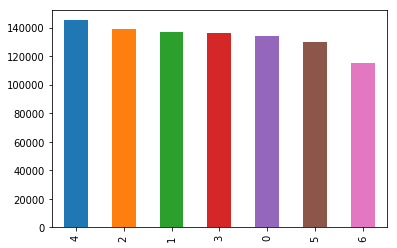

In [43]:
petty.fr_dow.value_counts().plot(kind='bar')

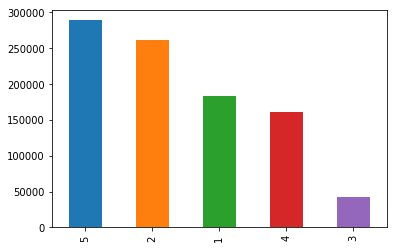

In [44]:
petty.BORO_NUM.value_counts().plot(kind='bar')

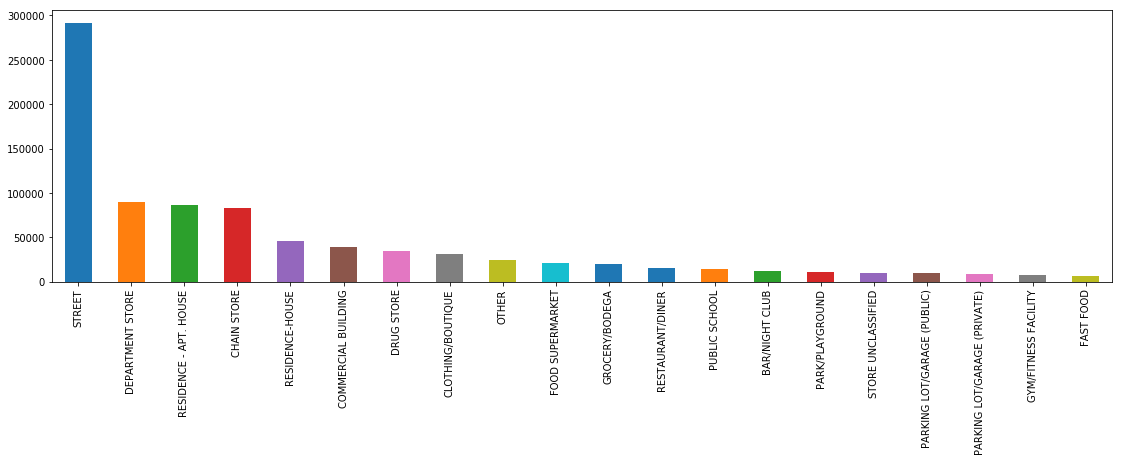

In [45]:
plt.figure(figsize=[19,5])
petty.PREM_TYP_DESC.value_counts().head(20).plot(kind='bar')

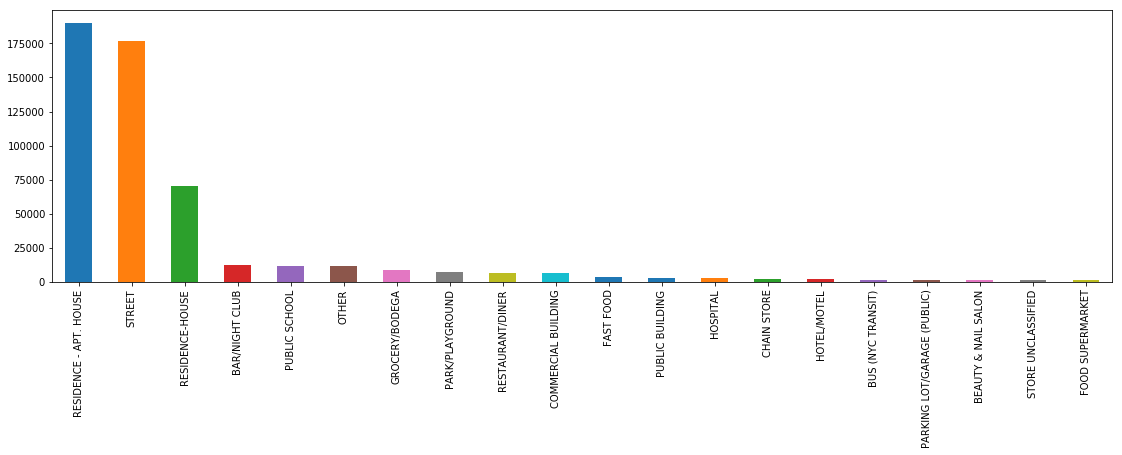

In [46]:
plt.figure(figsize=[19,5])
ass_3.PREM_TYP_DESC.value_counts().head(20).plot(kind='bar')

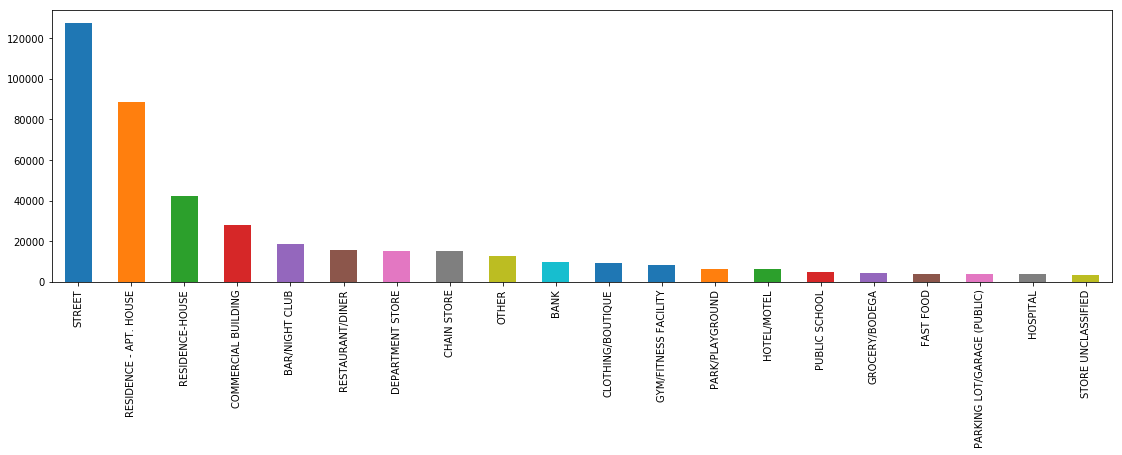

In [47]:
plt.figure(figsize=[19,5])
grand.PREM_TYP_DESC.value_counts().head(20).plot(kind='bar')

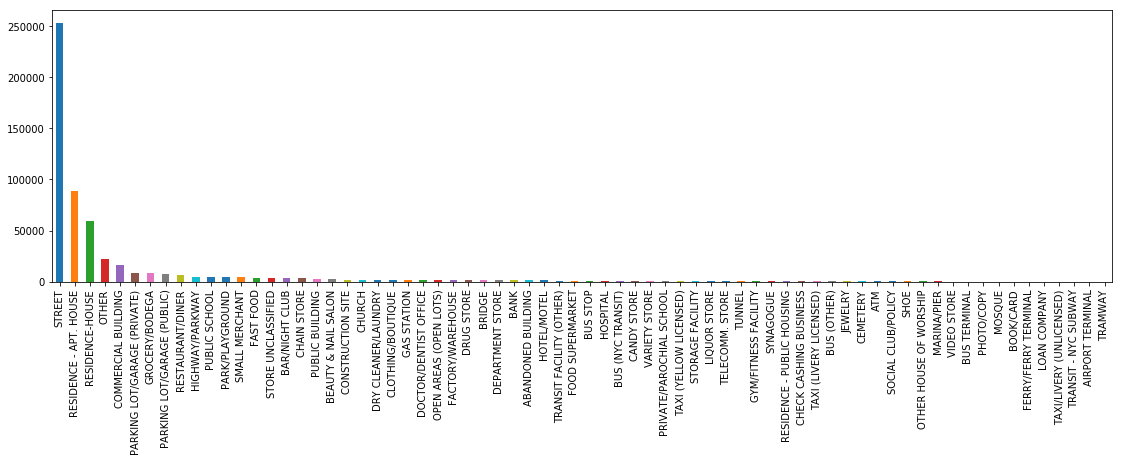

In [48]:
plt.figure(figsize=[19,5])
mis.PREM_TYP_DESC.value_counts().plot(kind='bar')

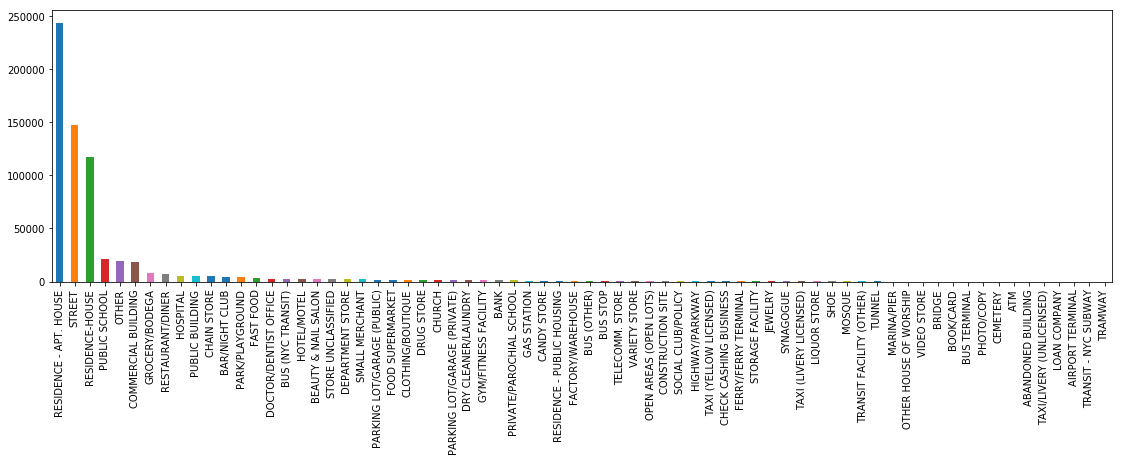

In [49]:
plt.figure(figsize=[19,5])
harass.PREM_TYP_DESC.value_counts().plot(kind='bar')

In [50]:
# plt.figure(figsize=[19,5])
# ass_fel.PREM_TYP_DESC.value_counts().plot(kind='bar')

In [51]:
print(len(petty))
print(len(ass_3))
print(len(grand))
print(len(mis))
print(len(harass))
print(len(burglary))
print(len(drugs))
print(len(ass_fel))
print(len(robbery))
print(len(pub_dis))

936233
542391
476752
543269
655829
209876
309937
193321
205039
288617


In [52]:
len(df_10)

4361264

In [53]:
p = df.PREM_TYP_DESC.unique()
prems = {}
for n in range(70):
    prems[p[n]] = n
prems

{'ABANDONED BUILDING': 55,
 'AIRPORT TERMINAL': 62,
 'ATM': 39,
 'BANK': 36,
 'BAR/NIGHT CLUB': 0,
 'BEAUTY & NAIL SALON': 17,
 'BOOK/CARD': 47,
 'BRIDGE': 45,
 'BUS (NYC TRANSIT)': 16,
 'BUS (OTHER)': 52,
 'BUS STOP': 35,
 'BUS TERMINAL': 64,
 'CANDY STORE': 43,
 'CEMETERY': 67,
 'CHAIN STORE': 14,
 'CHECK CASHING BUSINESS': 15,
 'CHURCH': 23,
 'CLOTHING/BOUTIQUE': 29,
 'COMMERCIAL BUILDING': 19,
 'CONSTRUCTION SITE': 34,
 'DEPARTMENT STORE': 24,
 'DOCTOR/DENTIST OFFICE': 31,
 'DRUG STORE': 3,
 'DRY CLEANER/LAUNDRY': 8,
 'FACTORY/WAREHOUSE': 44,
 'FAST FOOD': 6,
 'FERRY/FERRY TERMINAL': 30,
 'FOOD SUPERMARKET': 20,
 'GAS STATION': 12,
 'GROCERY/BODEGA': 18,
 'GYM/FITNESS FACILITY': 27,
 'HIGHWAY/PARKWAY': 50,
 'HOSPITAL': 37,
 'HOTEL/MOTEL': 21,
 'JEWELRY': 33,
 'LIQUOR STORE': 46,
 'LOAN COMPANY': 66,
 'MARINA/PIER': 49,
 'MOSQUE': 65,
 'OPEN AREAS (OPEN LOTS)': 48,
 'OTHER': 1,
 'OTHER HOUSE OF WORSHIP': 61,
 'PARK/PLAYGROUND': 10,
 'PARKING LOT/GARAGE (PRIVATE)': 25,
 'PARKING LOT/

In [54]:
df_10.columns

Index(['CMPLNT_NUM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'JURIS_DESC', 'BORO_NM', 'ADDR_PCT_CD',
       'PREM_TYP_DESC', 'CMPLT_FR', 'CMPLT_TO', 'BORO_NUM', 'from_year',
       'from_month', 'from_day', 'from_hour', 'from_minute', 'fr_dow',
       'to_year', 'to_month', 'to_day', 'to_hour', 'to_minute', 'to_dow',
       'OFFENSE_NUMBER', 'Danger'],
      dtype='object')

new dataframe was made with the same number of rows for each crime

In [66]:
new_df = pd.concat([petty.iloc[:1000,:],ass_3.iloc[:1000,:],grand.iloc[:1000,:],mis.iloc[:1000,:],harass.iloc[:1000,:],
                   burglary.iloc[:1000,:],drugs.iloc[:1000,:],ass_fel.iloc[:1000,:],robbery.iloc[:1000,:],
                    pub_dis.iloc[:1000,:]])

In [67]:
new_df.OFNS_DESC.unique()

array(['PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES', 'GRAND LARCENY',
       'CRIMINAL MISCHIEF & RELATED OF', 'HARRASSMENT 2', 'BURGLARY',
       'DANGEROUS DRUGS', 'FELONY ASSAULT', 'ROBBERY',
       'OFF. AGNST PUB ORD SENSBLTY &'], dtype=object)

In [68]:
pm = []
keys = prems.keys()

for n in new_df.PREM_TYP_DESC:
    pm.append(prems[n])
print(pm[:5])
new_df['PREM_NUM'] = pm
new_df.head()

[3, 6, 7, 14, 10]


,CMPLNT_NUM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,...,fr_dow,to_year,to_month,to_day,to_hour,to_minute,to_dow,OFFENSE_NUMBER,Danger,PREM_NUM
9,415095955,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,19.0,...,3,2015,12,31,23,10,3,3,0,3
10,731283092,12/31/2015,341,PETIT LARCENY,343.0,"LARCENY,PETIT OF BICYCLE",COMPLETED,N.Y. POLICE DEPT,BRONX,41.0,...,3,2015,12,31,23,15,3,3,0,6
11,178090167,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,13.0,...,3,2015,12,31,23,5,3,3,0,7
82,607105606,12/31/2015,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,N.Y. POLICE DEPT,QUEENS,103.0,...,3,2015,12,31,21,5,3,3,0,14
112,557672328,12/31/2015,341,PETIT LARCENY,339.0,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,N.Y. POLICE DEPT,MANHATTAN,5.0,...,3,2015,12,31,20,10,3,3,0,10


In [69]:
new_df.columns

Index(['CMPLNT_NUM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'JURIS_DESC', 'BORO_NM', 'ADDR_PCT_CD',
       'PREM_TYP_DESC', 'CMPLT_FR', 'CMPLT_TO', 'BORO_NUM', 'from_year',
       'from_month', 'from_day', 'from_hour', 'from_minute', 'fr_dow',
       'to_year', 'to_month', 'to_day', 'to_hour', 'to_minute', 'to_dow',
       'OFFENSE_NUMBER', 'Danger', 'PREM_NUM'],
      dtype='object')

In [70]:
features = new_df[['ADDR_PCT_CD','BORO_NUM','from_year','from_month','fr_dow',
               'from_hour','PREM_NUM']]

target = new_df.OFFENSE_NUMBER

In [71]:
data = new_df[['ADDR_PCT_CD','BORO_NUM','from_year','from_month','fr_dow',
               'from_hour','PREM_NUM','OFNS_DESC']]
# ,'to_year','to_month','to_dow','to_hour'

In [72]:
len(new_df)

10000

## Model

Created different models to test for performance and started with a Logistic Regression model.

In [73]:
from sklearn.model_selection import train_test_split

X = features
y = new_df.Danger
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
log = LogisticRegression()
log.fit(Xtrain,ytrain)
yp_log = log.predict(Xtest)
print(roc_auc_score(ytest,yp_log,))

0.5692581741007782


In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(ytest,yp_log))
print(classification_report(ytest,yp_log))

0.6445
             precision    recall  f1-score   support

          0       0.64      0.22      0.32       787
          1       0.64      0.92      0.76      1213

avg / total       0.64      0.64      0.59      2000



Logistic Regression seems to perform well enough for precision but the other performance metrics do not perform well. I check to see if tuning the parameters make it perform better.

In [87]:
from sklearn.model_selection import GridSearchCV

params = {'class_weight':[None,'balanced'],
          'C':[0.1,0.2,0.3,0.4,0.5,0.6],
          'fit_intercept':[False,True],
          'penalty':['l1','l2']
         }


clf = GridSearchCV(log,params,cv=5)
clf.fit(Xtrain,ytrain)
print(clf.score(Xtrain, ytrain))
print(clf.best_params_)

0.63925
{'C': 0.1, 'class_weight': None, 'fit_intercept': False, 'penalty': 'l2'}


In [88]:
log = LogisticRegression(C= 0.1, class_weight= None, fit_intercept= False, penalty= 'l2')
log.fit(Xtrain,ytrain)
yp_log2 = log.predict(Xtest)
print(roc_auc_score(ytest,yp_log2))

0.5692581741007782


In [89]:
print(classification_report(ytest,yp_log2))

             precision    recall  f1-score   support

          0       0.64      0.22      0.32       787
          1       0.64      0.92      0.76      1213

avg / total       0.64      0.64      0.59      2000



Tuning doesn't improve performance logistic regression performance, so I test other models to see if they are any better. Next one I test is the KNeighbors classifier.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(Xtrain,ytrain)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

y_pred = knn.predict(Xtest)

score = accuracy_score(ytest,y_pred)
print(score)

cvs = cross_val_score(knn,features,target)
print(cvs)

print(classification_report(ytest,y_pred))
print(roc_auc_score(ytest,y_pred))

0.647
[0.17155689 0.17957958 0.16576577]
             precision    recall  f1-score   support

          0       0.60      0.31      0.41       787
          1       0.66      0.87      0.75      1213

avg / total       0.64      0.65      0.61      2000

0.587160903008597


In [84]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)

yp_dtc = dtc.predict(Xtest)
print(classification_report(ytest,yp_dtc))

             precision    recall  f1-score   support

          0       0.49      0.54      0.52       787
          1       0.68      0.64      0.66      1213

avg / total       0.61      0.60      0.60      2000



More classifier models are tested for performance.

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtrain,ytrain)

yp_rfc = rfc.predict(Xtest)
print(classification_report(ytest,yp_rfc))
print(roc_auc_score(ytest,yp_rfc))

             precision    recall  f1-score   support

          0       0.56      0.50      0.52       787
          1       0.69      0.74      0.72      1213

avg / total       0.64      0.65      0.64      2000

0.6198049298629523


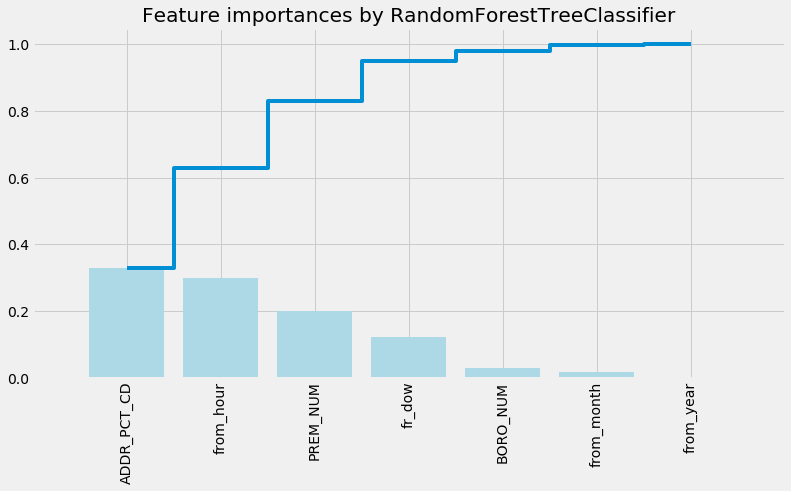

In [82]:
imp = rfc.feature_importances_
feats = features.columns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
indices = np.argsort(imp)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForestTreeClassifier")
plt.bar(range(len(indices)), imp[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(imp[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feats[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(Xtrain,ytrain)

yp_gbc = gbc.predict(Xtest)
print(classification_report(ytest,yp_gbc))

             precision    recall  f1-score   support

          0       0.67      0.36      0.47       787
          1       0.68      0.88      0.77      1213

avg / total       0.67      0.68      0.65      2000



Gradient boosting seems to perform the best so I then tune the hyperparameters to increase performance even more.

In [90]:
gbc_params = {'n_estimators':[100,500,1000],
             'subsample':[0.3,0.7,1.0],
             'min_samples_split':[2,4,6,8],
             'max_depth':[3,7,10],
             'max_features':['auto','sqrt','log2',None]
             }

gcv = GridSearchCV(gbc,gbc_params,cv=5)
gcv.fit(Xtrain,ytrain)
print(gcv.score(Xtrain, ytrain))
print(gcv.best_params_)

0.73525
{'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 1000, 'subsample': 1.0}


In [91]:
gbc = GradientBoostingClassifier(max_depth= 3, max_features = 'log2', min_samples_split= 4,
                                 n_estimators = 1000, subsample = 1.0)
gbc.fit(Xtrain,ytrain)
yp_gbc = gbc.predict(Xtest)
print(classification_report(ytest,yp_gbc))

             precision    recall  f1-score   support

          0       0.63      0.44      0.52       787
          1       0.70      0.83      0.76      1213

avg / total       0.67      0.68      0.66      2000



After tuning parameters, accuracy for 0 increased across the board while only precision for 1 increased while the other accuracy scores went down slightly.

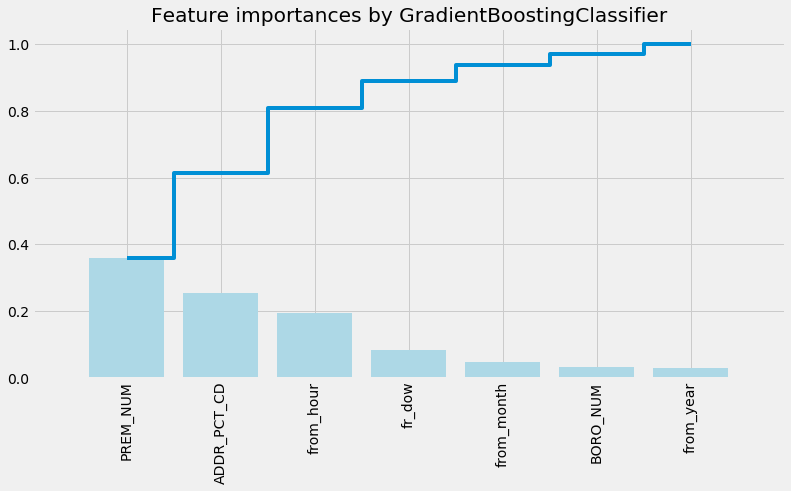

In [83]:
imp = gbc.feature_importances_
feats = features.columns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
indices = np.argsort(imp)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by GradientBoostingClassifier")
plt.bar(range(len(indices)), imp[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(imp[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feats[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## Conclusion



The model after tuning seems to show good results that can be useful to the clients in the field. The model was limited by the amount of time required for training the model and tuning it. If the model could be trained using not just the most common crimes, but all crimes called into the NYPD, it would be able to be used for more real world application. Also, the model would be most reliable in real life application if it was able to take in new data daily, and retrain itself so that it takes into account new trends and patterns in order to get the most accurate predicions. Also if the model could somehow take into account how a caller sounds, and their tone of voice in order to predict the level of danger that he is in, would make it an immensely powerful tool to assist NYPD dispatchers.